# Greedy Algorithmen - Musterlösungen

### 1.a) Greedy Näherungslösung des 0/1 Rucksackproblems

Durch Weglassen des `else`-Zweigs (wo der Bruchteil hinzugefügt wird), läuft die Schleife bis alle Gegenstände geprüft wurden. Die Gegenstände mit dem höchsten spezifischen Wert werden dem Rucksack hinzugefügt, solange die Restkapazität es erlaubt.

In [17]:
import heapq # Priority Queue

def greedyKnapsack(items, K):
    sort = []
    for item in items:
        heapq.heappush(sort,(item[0]/item[1],item)) # Gewicht/Wert
    knapsack = []
    weight = 0
    value = 0
    while len(sort):
        (sw,item) = heapq.heappop(sort)
        if weight + item[0] <= K: # passt vollständig in den Rucksack
            knapsack.append(item)
            weight += item[0]
            value += item[1]
    return (knapsack, weight, value)

items = [(90, 1000),(33, 350),(33, 350), (33, 350)] # (Gewicht, Wert)
print(greedyKnapsack(items, 100))

([(90, 1000)], 90, 1000)


### 1.b) Vergleich mit Branch and Bound

Der Branch and Bound Algorithmus löst das 0/1 Rucksackproblem.

In [18]:
import heapq # Priority Queue

def bnbKnapsack(items, K):
    # Sortierung der Gegenstände nach Gewicht pro Werteinheit (kleiner ist besser)
    sortedItems = sorted(items, key=lambda x: x[0] / x[1])
    bestKS = []  # [0,1,1,0] heißt das item1 und 2 enthalten sind und item0 und 3 nicht, anfangs leer
    # Hilfsfunktion zur Bestimmung des Rucksackwerts
    def ksValue(ks): return sum([sortedItems[i][1] if ks[i] == 1 else 0 for i in range(len(ks))])
    # Hilfsfunktion zur Bestimmung des Rucksackgewichts
    def ksWeight(ks): return sum([sortedItems[i][0] if ks[i] == 1 else 0 for i in range(len(ks))])
    # Hilfsfunktion zur Bestimmung des maximal erreichbaren Rucksackwerts
    def limit(ks): return ksValue(ks)+(K-ksWeight(ks))*sortedItems[len(ks)][1]/sortedItems[len(ks)][0]

    knapsacks = []  # die aktuellen Knoten, sortiert nach maximal erreichbarem Rucksackwert
    heapq.heappush(knapsacks, (1 / limit([]), []))  # Wurzel ist der leere Rucksack
    while len(knapsacks): # solange es Knoten zu prüfen gibt
        ks = heapq.heappop(knapsacks)[1]  # Knoten mit dem höchsten erreichbaren Rucksackwert als nächstes
        for x in [0,1]: # Expandieren zu 2 neuen Knoten
            expanded = ks + [x]
            if ksWeight(expanded) <= K:  # Kapazitätsgrenze noch nicht überschritten
                best = ksValue(bestKS) # momentan bester Rucksack
                if len(expanded) < len(sortedItems):  # noch kein vollständiger Rucksack
                    m = limit(expanded) # maximal zu erreichender Wert
                    if m > best:  # könnte ein besserer Rucksack erzielt werden?
                        heapq.heappush(knapsacks, (1 / m, expanded))
                if best < ksValue(expanded):  # besser?
                    bestKS = expanded
    ks = [sortedItems[i] for i in range(len(bestKS)) if bestKS[i]]
    return (ks, ksWeight(bestKS), ksValue(bestKS))

print("Best:",bnbKnapsack(items, 100))

Best: ([(33, 350), (33, 350), (33, 350)], 99, 1050)


Zum Vergleich der Laufzeiten und Ergebnisse werden zufällige Rucksackprobleme benötigt.

In [19]:
import random
import math

def generateKnapsackParameters(n):
    sumw = 0 # Summe aller generierten Gewichte
    items = [] # generierte Gegenstände
    for i in range(n):
        value = random.randint(1,100)
        weight = random.randint(1,100)
        sumw += weight
        items.append((weight,value))
    return (items, math.floor(sumw*0.8)) # Kapazität bei 80% des Gesamtgewichts

print(generateKnapsackParameters(4))

([(16, 63), (27, 69), (27, 27), (44, 52)], 91)


Die beiden Algorithmen werden auf dasselbe Problem angewendet. Dabei wird die Laufzeit gemessen und der erreichte Rucksackwert ermittelt. Eine mehrfache Wiederholung bewirkt, dass ungünstige Zufallssituationen das Gesamtergebnis nicht verfälschen. Die Summen der jeweils benötigten Zeiten und der gefundenen Rucksackwerte stellen das Testergebnis dar.

In [26]:
import time

def runTest(alg1, alg2, n, numOfRuns):
    time1 = 0
    time2 = 0
    sum1 = 0
    sum2 = 0
    for i in range(numOfRuns):
        (items, K) = generateKnapsackParameters(n)
        tstart = time.time()
        sum1 += alg1(items, K)[2]
        time1 += time.time()-tstart
        tstart = time.time()
        sum2 += alg2(items, K)[2]
        time2 += time.time()-tstart
    return (time1, sum1, time2, sum2)

(greedyTime, greedyValue, bnbTime, bnbValue) = runTest(greedyKnapsack,bnbKnapsack, 20, 50)
print("Greedy:",greedyValue, "in", greedyTime)
print("BnB:",bnbValue, "in", bnbTime)

Greedy: 96126 in 0.001997232437133789
BnB: 96352 in 7.929816246032715


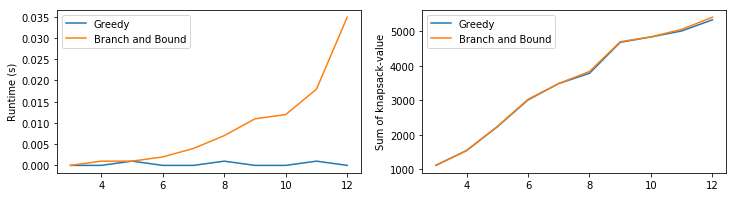

In [55]:
import matplotlib.pyplot as plt

sizes = []
timeGreedy = []
timeBnB = []
valueGreedy = []
valueBnB = []
for n in range(3,13):
    (gTime, gValue, bTime, bValue) = runTest(greedyKnapsack,bnbKnapsack, n, 10)
    sizes.append(n)
    timeGreedy.append(gTime)
    timeBnB.append(bTime)
    valueGreedy.append(gValue)
    valueBnB.append(bValue)

plt.rcParams["figure.figsize"] = (12,3)

ax = plt.subplot(1,2,1)
ax.plot(sizes, timeGreedy, label="Greedy");
ax.plot(sizes, timeBnB, label="Branch and Bound");
ax.set_ylabel("Runtime (s)")
l1 = ax.legend()

ax2 = plt.subplot(1,2,2)
ax2.plot(sizes, valueGreedy, label="Greedy");
ax2.plot(sizes, valueBnB, label="Branch and Bound");
ax2.set_ylabel("Sum of knapsack-value")
l2 = ax2.legend()

Durch die grafische Aufbereitung wird auf den ersten Blick ersichtlich, dass der Greedy Algorithmus deutlich effizienter ist und dass die Näherung nur wenig schlechter ist als die exakte Lösung. Dies sind die Gründe warum Greedy Algorithmen in der Praxis sehr häufig Anwendung finden.

### 2.c) Wie kommt Heiko am besten zu Ricarda?

Die verschiedenen Personen stellen die Knoten eines Graphen dar. Kennen sich zwei Personen werden die entsprechenden Knoten durch eine Kante verbunden. Der Bekanntschaftsgrad bestimmt das Gewicht einer Kante (flüchtig = 1, gut = 2). Der entstehende Graph kann als Entfernungsmatrix angegeben und vom Dijkstra Algorithmus gelöst werden.

In [71]:
inf = float("inf")
def shortestPathDijkstra(matrix, start, end):
    # für alle Knoten (Distanz, (Knotenindex, Vorgängerknoten)
    # Distanz = inf außer beim Start-Knoten, Vorgänger=None
    nodes = [(inf if i != start else 0, (i, None)) for i in range(len(matrix))]
    heapq.heapify(nodes)  # Heap-sortiert nach Distanz
    while len(nodes):  # Solange es nicht verarbeitete Knoten gibt
        n = heapq.heappop(nodes)  # Knoten mit der geringsten Distanz
        if n[1][0] == end:  # Index des Endknoten erreicht?
            result = [n[1][0]]  # Weg endet mit Endknoten
            r = n[1][1]  # Vorgänger auf dem Weg zum Endknoten
            while r:  # solange es noch Vorgänger gibt
                result = [r[0]] + result  # Weg um Vorgänger erweitern
                r = r[1]  # dessen Vorgänger ermitteln
            return (result, n[0])  # (Weg von start zu end, Länge)
        nextnodes = []  # Update der übrigen Knoten
        for nn in nodes:  # für alle noch nicht verarbeiteten Knoten
            if n[0] + matrix[n[1][0]][nn[1][0]] < nn[0]:  # kürzer von start zu nn?
                # Distanz und Vorgänger aktualisieren
                heapq.heappush(nextnodes, (n[0] + matrix[n[1][0]][nn[1][0]], (nn[1][0], n[1])))
            else: # anderenfalls unverändert in priority-queue übernehmen
                heapq.heappush(nextnodes, nn)
        nodes = nextnodes # aktualisierte Knoten für den nächsten Durchlauf
    return "bad input"

relations = [
    ("Frank", "Alex", 2),("Frank", "Ina", 1),
    ("Alex", "Maik", 2),("Alex", "Sandra", 1),
    ("Ina", "Maik", 1),("Ina", "Nicole", 1),("Ina", "Ricarda", 2),
    ("Maik", "Ricarda", 1),("Maik", "Nicole", 2),
    ("Sandra", "Nicole", 2),("Sandra", "Heiko", 1)
]

persons = set()
for r in relations:
    persons.add(r[0])
    persons.add(r[1])
persons = list(persons)
    
matrix = [[inf for _ in persons] for _ in persons]
for r in relations:
    i1 = persons.index(r[0])
    i2 = persons.index(r[1])
    matrix[i1][i2] = matrix[i2][i1] = r[2]

path = shortestPathDijkstra(matrix, persons.index("Heiko"), persons.index("Ricarda"))
result = [persons[p] for p in path[0]]
print(result, path[1])
    

['Heiko', 'Sandra', 'Alex', 'Maik', 'Ricarda'] 5


### 3.a) Algorithmus von Kruskal

Die Idee von Kruskal ist, einfach die Kanten aufsteigend nach ihrem Gewicht zu durchlaufen und diese nacheinander dem Spannbaum hinzuzufügen. Die Kante (a,b) mit dem geringsten Gewicht initialisiert einen ersten Teilspannbaum [a,b]. Wird als nächstes eine Kante (b,c) hinzugefügt (b ist im Teilspannbaum enthalten und c nicht) dann kann das Teilergebnis einfach erweitert werden zu [a,b,c]. Sollte jedoch eine Kante (x,y) hinzugefügt werden, dann entstünde ein neuer Teilspannbaum [x,y]. Erst durch die spätere Hinzunahme der Kante (a,x), (a,y), (b,x) oder (b,y) könnten die beiden Teilspannbäume zu [a,b,x,y] kombiniert werden. Demnach werden hier solange Kanten zum Ergebnis hinzugefügt, bis alle hinzugefügten Kanten einen Verbund ergeben.

In [74]:
inf = float("inf")
distanceMatrix = [
    #nach A ,  B ,  C ,  D ,  E
    [inf,  11,   2, inf, inf],  # von A
    [11, inf, inf,   5,   1],  # von B
    [2, inf, inf,   3, inf],  # von C
    [inf,   5,   3, inf,   8],  # von D
    [inf,   1, inf,   8, inf]  # von E
]

def kruskalMinSpanTree(matrix):
    n = len(matrix)
    edges = [] # Kantenermittlung aus Matrix 
    for i in range(n):
        for j in range(n):
            if matrix[i][j] != inf:
                edges.append((matrix[i][j], (i, j)))
    edges.sort() # Sortierung nach Kantengewicht
    
    nodesets = [] # Array von sets mit Knoten der Teilbäume
    def inNodeset(p, sets): # Set-Index in dem p enthalten ist
        for i in range(len(sets)):
            if p in sets[i]:
                return i
        return -1
    
    mintree = []
    minlength = 0
    while len(edges):
        e = edges.pop(0) # kürzeste Kante
        ept = e[1] # (von-Knoten, bis-Knoten)
        i1 = inNodeset(ept[0], nodesets)
        i2 = inNodeset(ept[1], nodesets)
        if i1 == i2:
            if i1 == -1: # beide Knoten noch nicht im Minimalbaum
                nodesets.append(set([ept[0],ept[1]])) # neues Knoten-Set
            else: # beide Kantenenden befinden sich im gleichen Set
                continue  # Kante zwischen den Knoten bereits drin oder Kreis
        else: 
            if i1 == -1: # bis-Knoten ist in Set i2
                nodesets[i2].add(ept[0]) # von-Knoten kommt dort hinzu
            elif i2 == -1: # von-Knoten ist in Set i1
                nodesets[i1].add(ept[1]) # bis-Knoten kommt dort hinzu
            else: # Kante verbindet 2 Teilbäume
                for p in nodesets[i1]: # alle Knoten aus Set i1
                    nodesets[i2].add(p) # kommen in Set i2
                nodesets.pop(i1) # Set i1 wird entfernt
        mintree.append(ept) # Kante ist Teil des minimalen Spannbaums
        minlength += e[0] # Länge des Spannbaums wird erweitert
    if len(nodesets) > 1: # es gibt mehr als einen minimalen Spannbaum
        return "Not connected" # der Graph ist nicht verbunden
    return (minlength, mintree)
        

print(kruskalMinSpanTree(distanceMatrix))


(11, [(1, 4), (0, 2), (2, 3), (1, 3)])


### 3.b) Algorithmus von Prim

Der Algorithmus von Prim geht ganz ähnlich vor wie der von Dijkstra bei der Suche nach der kürzesten Distanz. Ausgehend von einem beliebigen Startknoten werden dessen Verbindungen solange als Kandidaten für den minimalen Spannbaum gehandelt, bis deren Zugehörigkeit feststeht. Im Gegensatz zum Dijkstra-Algorithmus müssen hier alle Knoten durchlaufen werden (Dijkstra kann bei Erreichen des Zielknotens vorzeitig beendet werden). Außerdem wird an jedem Knoten der kürzeste Weg zum Vorgänger hinterlegt (nicht wie bei Dijkstra der kürzeste Weg zum Startknoten). So wird nach und nach jedem Knoten der Vorgänger-Knoten mit kürzester Distanz zugeordnet. Die so entstehenden Kanten beschreiben den minimalen Spannbaum

In [73]:
def primMinSpanTree(matrix):
    # für alle Knoten (Distanz, (Knotenindex, Vorgängerknoten)
    # Distanz = inf außer beim Start-Knoten, Vorgänger=None
    nodes = [(inf if i != 0 else 0, (i, None)) for i in range(len(matrix))]
    heapq.heapify(nodes)  # Heap-sortiert nach Distanz
    mintree = []
    minlength = 0
    while len(nodes):  # Solange es nicht verarbeitete Knoten gibt
        n = heapq.heappop(nodes)  # Knoten mit der geringsten Distanz
        nextnodes = []  # Update der übrigen Knoten
        for nn in nodes:  # für alle noch nicht verarbeiteten Knoten
            if matrix[n[1][0]][nn[1][0]] < nn[0]:  # kürzer von n zu nn?
                # Distanz und Vorgänger von nn aktualisieren
                heapq.heappush(nextnodes, (matrix[n[1][0]][nn[1][0]], (nn[1][0], n[1])))
            else:  # anderenfalls unverändert in priority-queue übernehmen
                heapq.heappush(nextnodes, nn)
        nodes = nextnodes  # aktualisierte Knoten für den nächsten Durchlauf
        if n[1][0] > 0: # außer beim Startknoten
            parent = n[1][1]
            mintree.append((parent[0], n[1][0])) # Kante von parent zu n
            minlength += n[0] # 
    return (minlength, mintree)


print(primMinSpanTree(distanceMatrix))

(11, [(0, 2), (2, 3), (3, 1), (1, 4)])


### 3.c) Kruskal vs. Prim

Die zufällige Erzeugung von Graphen erfolgt hier zunächst durch Erzeugen eines minimalen Spannbaums. Dieser hat die geringstmögliche Anzahl von Kanten bei gegebener Anzahl von Knoten. Dieser Minimalgraph wird nun sukzessive um weitere zufällige Kanten erweitert, sodass die gewünschte Kantenzahl erreicht wird.

In [123]:
def generateGraph(n, m, maxWeight=100):
    m = max(n-1, min(m,n*(n-1)//2)) # zwischen n-1 und n(n-1)/2 Kanten möglich
    matrix = [[inf for i in range(n)] for j in range(n)]
    for i in range(1,n): # Min. Spannbaum erzeugen
        j = math.floor(random.random()*i)
        matrix[i][j] = matrix[j][i] = random.randint(1,maxWeight)
        m -= 1
    while m > 0: # um Kanten erweitern
        i = math.floor(random.random()*n)
        j = math.floor(random.random()*n)
        if i == j or matrix[i][j] != inf: continue
        matrix[i][j] = matrix[j][i] = random.randint(1,maxWeight)
        m -= 1
    return matrix

print(generateGraph(5,6))


[[inf, 75, inf, inf, 50], [75, inf, 49, 89, inf], [inf, 49, inf, 100, inf], [inf, 89, 100, inf, 52], [50, inf, inf, 52, inf]]


In [83]:
def runTest(alg1, alg2, n,m, numOfRuns):
    time1 = 0
    time2 = 0
    for i in range(numOfRuns):
        matrix = generateGraph(n,m)
        tstart = time.time()
        alg1(matrix)
        time1 += time.time()-tstart
        tstart = time.time()
        alg2(matrix)
        time2 += time.time()-tstart
    return (time1, time2)

print(runTest(kruskalMinSpanTree,primMinSpanTree,100,500,100))

(0.26546740531921387, 0.15630078315734863)


Um zu prüfen welchen Einfluss die Anzahl Kanten auf die beiden Algorithmen hat, wird eine konkrete Knotenanzahl festgelegt und die Anzahl der Kanten variiert. In festen Schrittgrößen über den Bereich der möglichen Kantenzahl werden nun Graphen generiert und die Algorithmen auf diese angewendet.

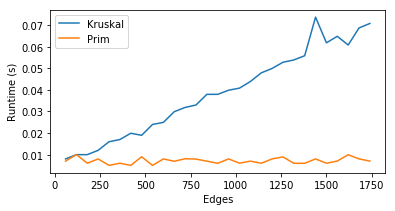

In [122]:
sizes = []
timesK = []
timesP = []
n = 60
for m in range(n,n*(n-1)//2,n):
    (timeK, timeP) = runTest(kruskalMinSpanTree,primMinSpanTree, n, m, 10)
    sizes.append(m)
    timesK.append(timeK)
    timesP.append(timeP)
        
plt.rcParams["figure.figsize"] = (6,3)

ax = plt.subplot()
ax.plot(sizes, timesK, label="Kruskal")
ax.plot(sizes, timesP, label="Prim")
ax.set_ylabel("Runtime (s)")
ax.set_xlabel("Edges")
l1 = ax.legend()



Es zeigt sich, dass der Algorithmus von Prim kaum von der Anzahl der Kanten abhängt.